In [2]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [3]:
# 0.84/np.power(10,3)

In [4]:
def default_pars( **kwargs):
    pars = {}
    pars['R0'] = 864
    pars['Ego'] = 1.44
    pars['SI'] = 0.72
    pars['sigma'] = 43.2
    pars['alpha'] = 20000  
    pars['k'] = 432

    pars['d0'] = 0.06
    pars['R1'] = 0.84/np.power(10,3)
    pars['R2'] = 0.24/np.power(10,5)
    return pars

In [5]:
def bifurcation_dia(pars):
    R0 = pars['R0']
    Ego = pars['Ego']
    SI = pars['SI']
    sigma = pars['sigma']
    alpha = pars['alpha']
    k = pars['k']
    
    beta =300
    
    dG_append=[]
    I_append = []

    dI_append=[]
    G_append = []
    
    G_init=0
    I_init=0    
    for i in range(0,3000):

        I =(I_init + i * 0.01)
        G =(G_init + i * 0.2)
        
        dG = R0/(Ego+SI*I)
#         dI = ( (beta*sigma*  ( np.power(G[it],2)/(alpha+np.power(G[it],2)) ))-k*I[it])
        dI = (beta*sigma* np.power(G,2))/((alpha+np.power(G,2)) *k)
    
        I_append.append(I)
        dG_append.append(dG)
        G_append.append(G)
        dI_append.append(dI)
        
    return(I_append,dG_append,G_append,dI_append)    

In [6]:
pars = default_pars()
I_bif,dG_bif,G_bif,dI_bif =bifurcation_dia(pars)

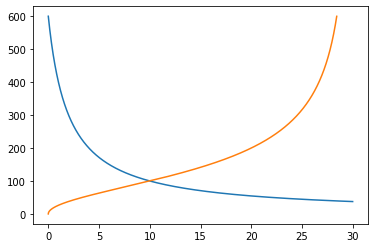

In [7]:
plt.plot(I_bif,dG_bif)
plt.plot(dI_bif,G_bif)

In [8]:
def bifurcation_cellcycle(pars):
    d0 = pars['d0']
    R1 = pars['R1']
    R2 = pars['R2']
    
    
    dR_append=[]
    dd_append=[]
    G_append = []
    
    G_init=0    
    for i in range(0,3500):

        G =(G_init + i * 0.1)
        dR = (R1*0.5*G-R2*0.5*np.power(G,2))
        dd = (d0-R1*0.5*G+R2*0.5*np.power(G,2))
        G_append.append(G)
        dR_append.append(dR)
        dd_append.append(dd)
    return(G_append,dR_append,dd_append)        

In [9]:
pars = default_pars()
G_bif,dR_bif,dd_bif =bifurcation_cellcycle(pars)

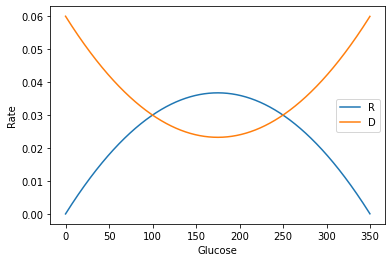

In [10]:
plt.plot(G_bif,dR_bif)
plt.plot(G_bif,dd_bif)
plt.ylabel('Rate')
plt.xlabel('Glucose')
plt.legend('RD')

In [11]:
def bifurcation_cellmass(pars,R1_param):
    d0 = pars['d0']
    R1 = R1_param#pars['R1']
    R2 = pars['R2']
    
    dbeta_append=[]
    G_append = []
    beta_append = []
    
    G_init=0    
    beta_init=0
    for i in range(0,1200):

        G =(G_init + i * 0.5)
#         beta =(beta_init + i * 1)
        
        dbeta = (-d0+R1*G-R2*np.power(G,2))
#         dbeta = (R1+np.sqrt((np.power(R1,2)-4*R2*d0)))/(2*R2)
        
        G_append.append(G)
        beta_append.append(0)
        dbeta_append.append(dbeta)
    return(G_append,beta_append,dbeta_append) 

In [12]:
pars = default_pars()

R1_param = 0.84/np.power(10,3)
G_bif,beta_bif,dbeta_bif=bifurcation_cellmass(pars,R1_param)
R1_param = 0.8/np.power(10,3)
G_bif1,beta_bif1,dbeta_bif1 =bifurcation_cellmass(pars,R1_param)
R1_param = 0.76/np.power(10,3)
G_bif2,beta_bif2,dbeta_bif2 =bifurcation_cellmass(pars,R1_param)
R1_param = 0.74/np.power(10,3)
G_bif3,beta_bif3,dbeta_bif3 =bifurcation_cellmass(pars,R1_param)

In [13]:
dbeta_bif[199],dbeta_bif[200],dbeta_bif[201],dbeta_bif[499],dbeta_bif[500],dbeta_bif[501]

(-0.00018060000000000992,
 -6.938893903907228e-18,
 0.0001793999999999997,
 0.00017939999999999623,
 0.0,
 -0.00018060000000003074)

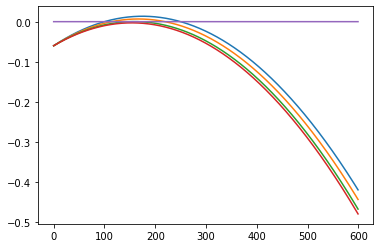

In [14]:
# G<100; beta mass >300, negative feedback to bring beta_mass to 300 and G to 100;
#(G>100 and G <=250)->(beta_mass <300 and beta_mass >37) postive feedback to bring it to 300 and G to 100;
# G > 250; beta_mass < 37 negative feedback to bring G to 600 and beta_mass to zero.

plt.plot(G_bif,dbeta_bif)
plt.plot(G_bif1,dbeta_bif1)
plt.plot(G_bif2,dbeta_bif2)
plt.plot(G_bif3,dbeta_bif3)
plt.plot(G_bif,beta_bif)

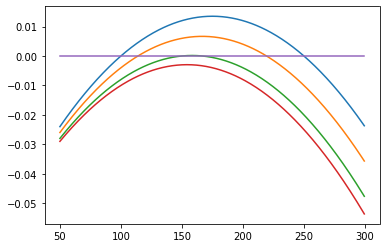

In [15]:
plt.plot(G_bif[100:600],dbeta_bif[100:600])
plt.plot(G_bif1[100:600],dbeta_bif1[100:600])
plt.plot(G_bif2[100:600],dbeta_bif2[100:600])
plt.plot(G_bif3[100:600],dbeta_bif3[100:600])
plt.plot(G_bif[100:600],beta_bif[100:600])

In [16]:
# G=50
d0 = 0.06
R1 = 0.84/np.power(10,3)
R2 = 0.24/np.power(10,5)
# np.exp(-d0+R1*G-R2*np.power(G,2))

In [17]:
(R1-np.sqrt((np.power(R1,2)-4*R2*d0)))/(2*R2),(R1+np.sqrt((np.power(R1,2)-4*R2*d0)))/(2*R2)

(100.00000000000001, 249.99999999999994)

In [18]:
def bif_betaInsulinGlu_model(pars,G_param,R1_param):
    
    R0 = pars['R0']
    Ego = pars['Ego']
    SI = pars['SI']
    sigma = pars['sigma']
    alpha = pars['alpha']
    k = pars['k']
    d0 = pars['d0']
    R1 = R1_param #pars['R1']
    R2 = pars['R2']   

    I_append=[]
    G_append = []
    beta_append = []
    # Initialize 
    for i in range(60,600):
        
        G =G_param+i+1

        I =(((R0/G)-Ego)/SI)  

    #     beta[0] =200   
        beta =(k*I*(alpha+np.power(G,2)))/ (sigma*np.power(G,2))
#         print(G,I,beta)
        G_append.append(G)
        I_append.append(I)
        beta_append.append(beta)
    return G_append,I_append,beta_append

In [19]:
pars = default_pars()
G_param = 0
R1_param = 0.84/np.power(10,3)
G_bif,I_bif,beta_bif =bif_betaInsulinGlu_model(pars,G_param,R1_param)
R1_param = 0.8/np.power(10,3)
G_bif1,I_bif1,beta_bif1 =bif_betaInsulinGlu_model(pars,G_param,R1_param)

Text(0, 0.5, 'Glucose')

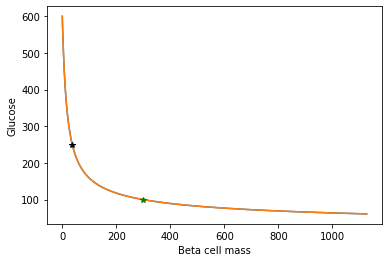

In [20]:
# G<100; beta mass >300, negative feedback to bring beta_mass to 300 and G to 100;
#(G>100 and G <=250)->(beta_mass <300 and beta_mass >37) postive feedback to bring it to 300 and G to 100;
# G > 250; beta_mass < 37 negative feedback to bring G to 600 and beta_mass to zero.

plt.plot(beta_bif,G_bif)
plt.plot(beta_bif1,G_bif1)

plt.plot(300,100,'g*')
plt.plot(37,250,'k*')
plt.xlabel('Beta cell mass')
plt.ylabel('Glucose')

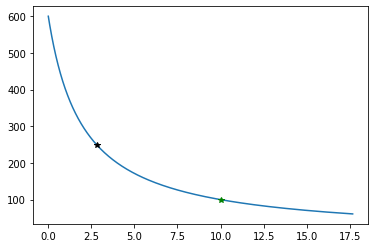

In [21]:
plt.plot(I_bif,G_bif)
plt.plot(10,100,'g*')
plt.plot(2.8,250,'k*')

Text(0, 0.5, 'Insulin')

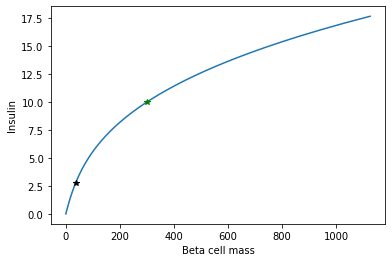

In [22]:
plt.plot(beta_bif,I_bif)
plt.plot(300,10,'g*')
plt.plot(37,2.8,'k*')
plt.xlabel('Beta cell mass')
plt.ylabel('Insulin')